In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [2]:
data = pd.DataFrame(pd.read_csv("day.csv"))
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Inspection

In [21]:
data.shape

(730, 16)

In [3]:
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Checking for null values

In [4]:
data.isnull().sum() * 100 / data.shape[0]

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

# Outlier Analysis

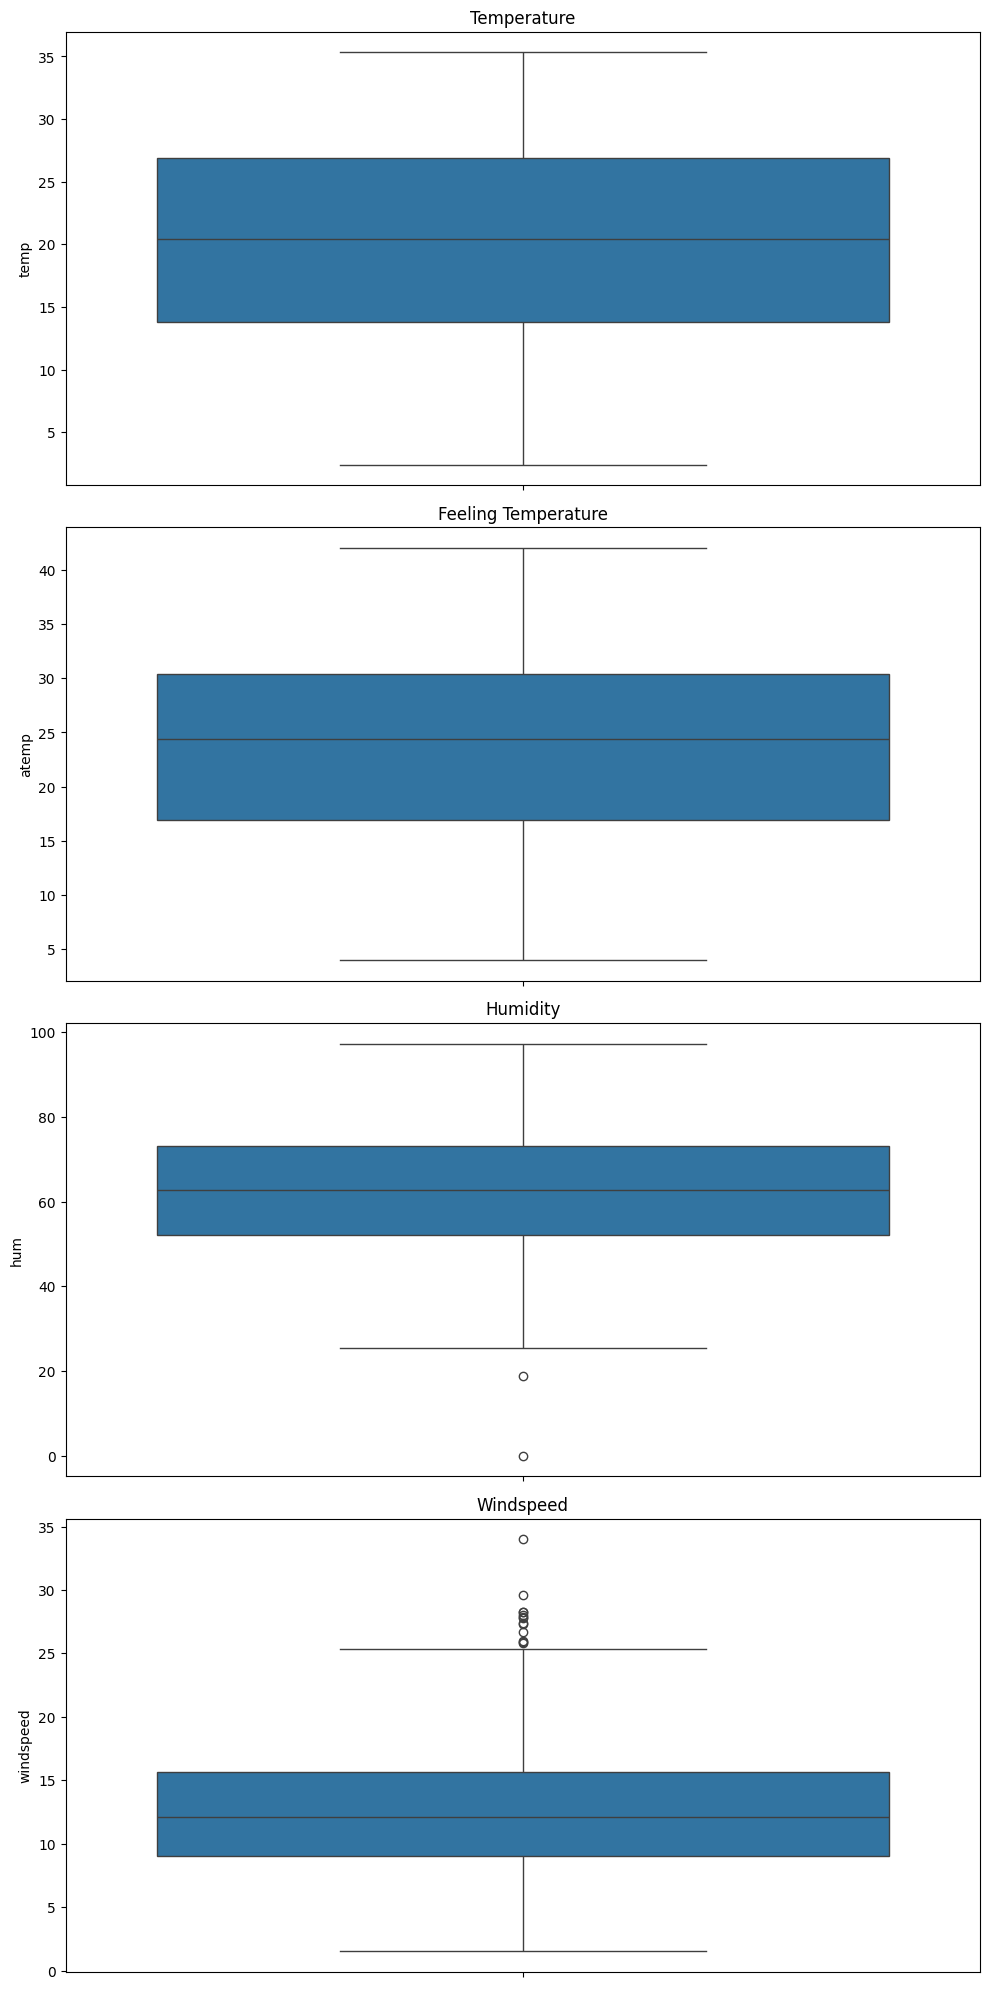

In [6]:
fig, axs = plt.subplots(4, figsize=(10, 20))
sns.boxplot(data['temp'], ax=axs[0])
axs[0].set_title('Temperature')

sns.boxplot(data['atemp'], ax=axs[1])
axs[1].set_title('Feeling Temperature')

sns.boxplot(data['hum'], ax=axs[2])
axs[2].set_title('Humidity')

sns.boxplot(data['windspeed'], ax=axs[3])
axs[3].set_title('Windspeed')

plt.tight_layout()
plt.show()

# Exploratory Data Analysis

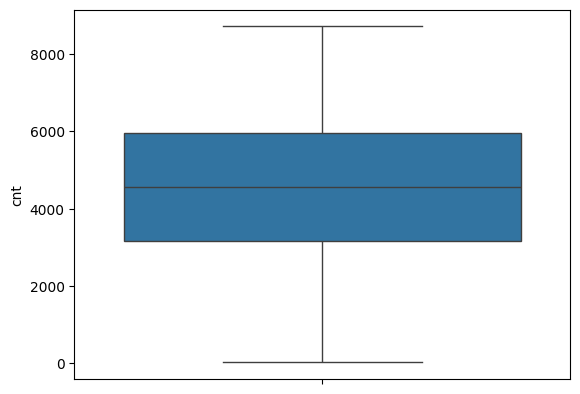

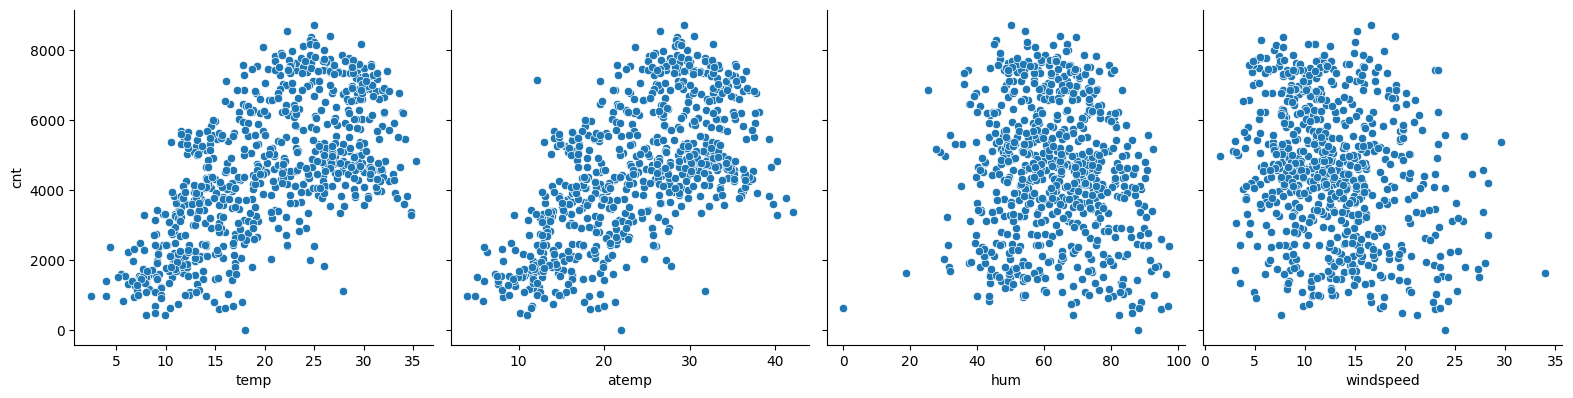

In [7]:
sns.boxplot(data['cnt'])
plt.show()

sns.pairplot(data, x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars='cnt', size=4, aspect=1, kind='scatter')
plt.show()

# Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split
X = data[['temp', 'atemp', 'hum', 'windspeed']]
y = data['cnt']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Building the model

In [10]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [11]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     114.6
Date:                Sun, 30 Jun 2024   Prob (F-statistic):           1.85e-69
Time:                        18:53:37   Log-Likelihood:                -4422.6
No. Observations:                 510   AIC:                             8855.
Df Residuals:                     505   BIC:                             8876.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3633.5825    425.372      8.542      0.0

# Residual analysis

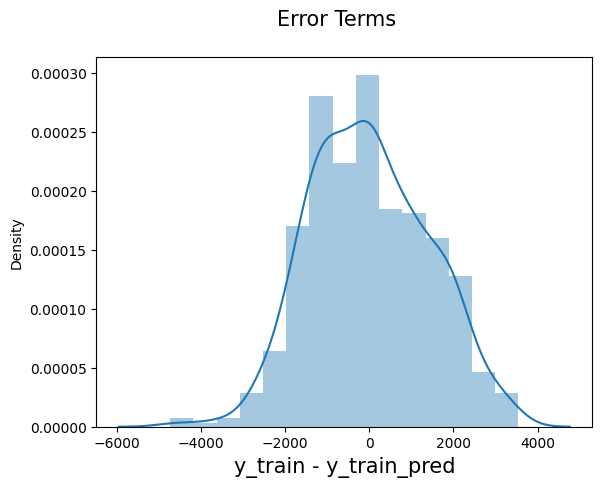

In [14]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

fig = plt.figure()
sns.distplot(res, bins=15)
fig.suptitle('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Predictions on the Test Set

In [15]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r_squared}")

RMSE: 1432.336329342922
R-squared: 0.42826431744894433


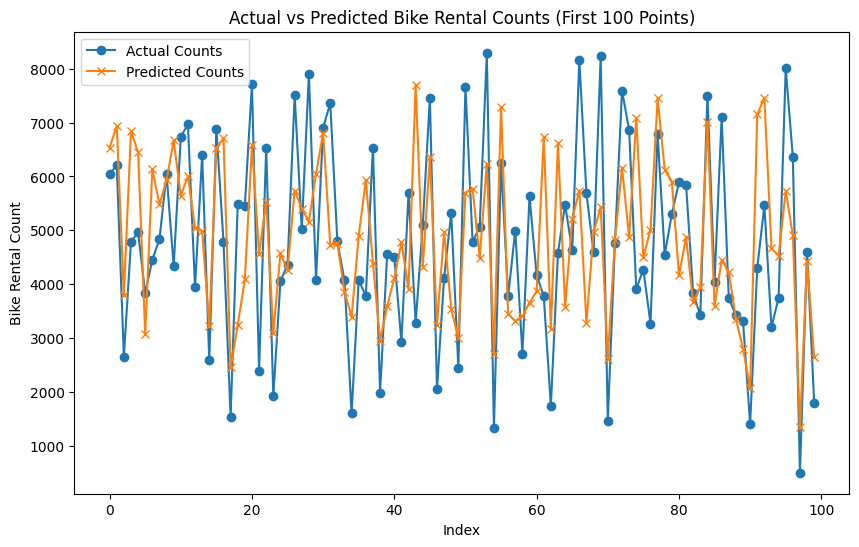

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test.values[:100])), y_test.values[:100], label='Actual Counts', marker='o')
plt.plot(range(len(y_pred[:100])), y_pred[:100], label='Predicted Counts', marker='x')
plt.xlabel('Index')
plt.ylabel('Bike Rental Count')
plt.title('Actual vs Predicted Bike Rental Counts (First 100 Points)')
plt.legend()
plt.show()
